# IIC 2115, Webscrapping (Parte 1): Get Requests a HTML
Autor: Felipe Gutiérrez / figutier@uc.cl 

## 1. Requests/ BeautifulSoup.

El proceso de webscrapping en su expresión mas básica consiste en la extracción de datos desde el texto plano que estructura la página web (HTML).

Requests nos brinda herramientas para la extracción de la página. BeautifulSoup es una librería cuyo objetivo es la extracción de elementos en el texto plano.

En este ejemplo, extraeremos un numero arbitrario de artículos de la sección pais del diario El Mostrador. Este proceso requerira extraer los links de la página que los contiene, y después acceder a tales links. Con la librería requests extraeremos el HTML donde estan contenidos los links y con BeautifulSoup extraeremos cada link del texto plano, para consultar cada uno de esos link con la librería requests, de ese texto podremos extraer cualquier elemento que nos interese. Cabe notar que este notebook esta hecho para la versión del sitio a la fecha (15/06/2023)

In [1]:
import requests
from bs4 import BeautifulSoup

### Extracción de links de artículos

En esta parte se entra a la página donde se encuentran los links de los artículos y se extraeran los links a consultar

Como se puede ver en el link de la sección pais del mostrador, la url toma la forma de:
https://www.elmostrador.cl/categoria/pais/
Además podemos notar que tiene un indexador de páginas para acceder a un conjunto secuencial de artículos. Esto implica que podemos iterar para cada página para obtener los links deseados. Además de esto, podemos ver con las herramientas de desarrollador el contenedo específico donde se encuentra cada link.


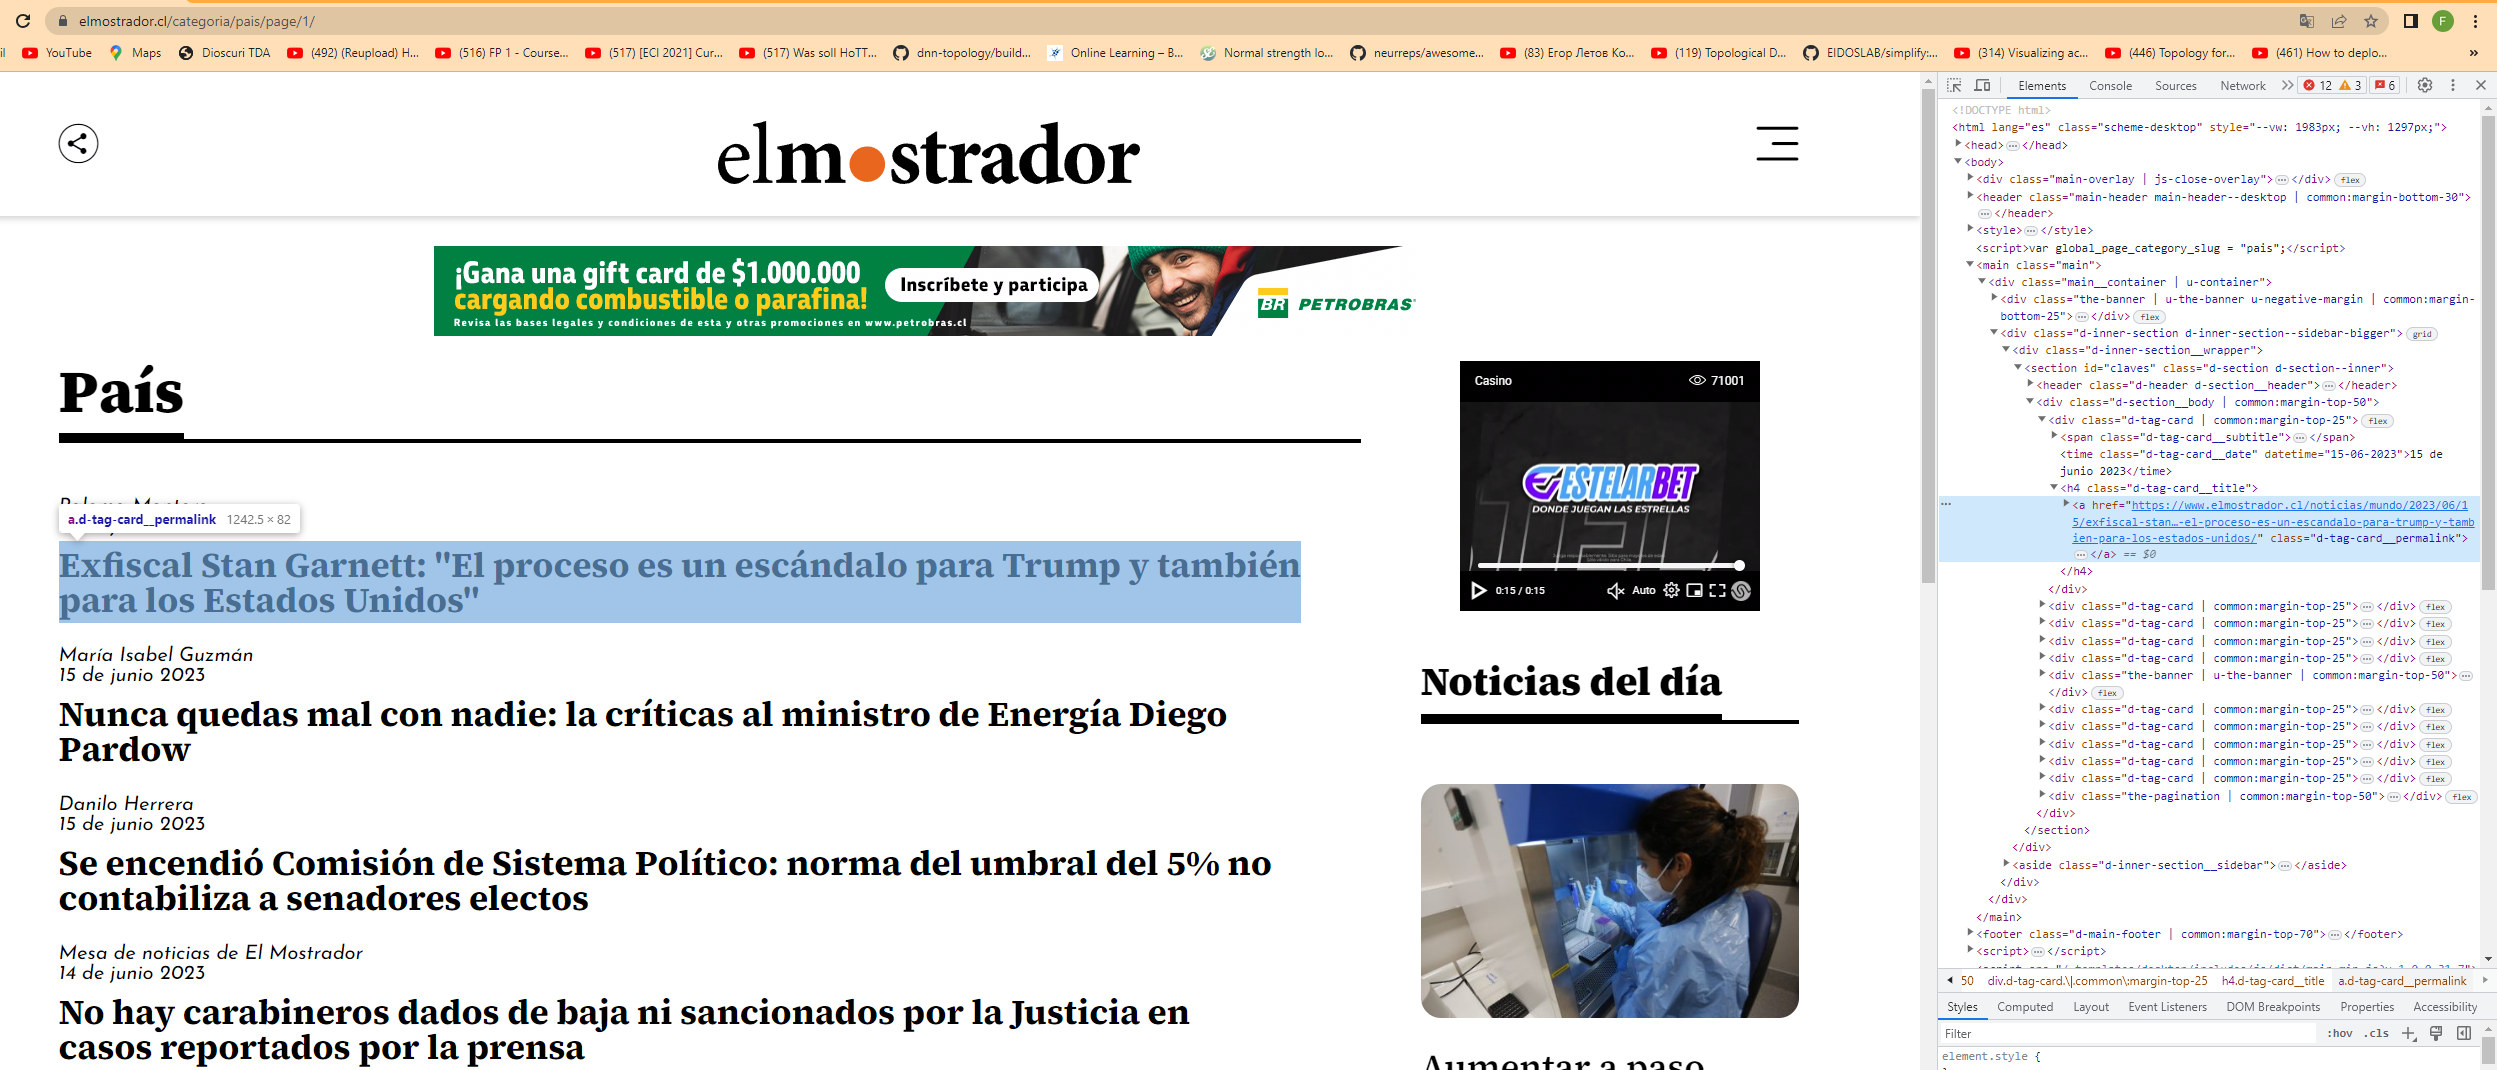

## Obteniendo páginas con requests

La librería requests nos entrega elementos para hacer solicitudes HTTP bajo sus distintos métodos, como GET y POST. En esta ocasión haremos una solicitud GET a la página de la categoría pais del mostrador. Veremos que esa solicitud nos retornará un objeto del tipo Response, al cual si le hacemos print nos entrega el código de Status de la solicitud. Pueden ver mas sobre estos códigos en : https://developer.mozilla.org/en-US/docs/Web/HTTP/Status.

El objeto Response cuenta con varios atributos y métodos asociados a acceder al contenido extraido. En particular, el atributo text contiene el texto HTML de la respuesta.

In [2]:
req = requests.get('https://www.elmostrador.cl/categoria/pais')
print(type(req))
print(req)


<class 'requests.models.Response'>
<Response [200]>


In [3]:
print(req.elapsed) #tiempo que se tardo
print(req.url) #url
print(req.headers) #encabezados

0:00:01.490347
https://www.elmostrador.cl/categoria/pais
{'Date': 'Thu, 15 Jun 2023 16:02:13 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Server': 'Digitalproserver front-elmostrador v32', 'Expires': 'Thu, 15 Jun 2023 16:07:13 GMT', 'Cache-Control': 'max-age=300', 'Content-Encoding': 'gzip'}


In [4]:
req.text

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n\n\n\n\n\n\n\n\n  \n\n \t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html lang="es" class="u-disable-effects scheme-desktop">\n\n<head>\n    <meta charset="utf-8" />\n    <meta http-equiv="x-ua-compatible" content="ie=edge" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <meta name="description" content="" />\n    <meta name="author" content="" />\n    <link rel="shortcut icon" href="/favicon.png" type="image/x-icon" />\n    <link rel="stylesheet" href="/_templates/desktop/includes/css/main.min.css?v=1.0.0.31_7" />\n    <meta name="theme-color" content="" />\n\n    \n    \n    <!-- VARIABLES PARA METAS -->\n    \n    \n\n    \n        \n    \n\n    \n        \n    \n    \n    \n        \n    \n\n    \n\n    \n\n\n    \n    \n\n    <!-- /VARIABLES PARA METAS -->\n\n    \n\n        <title>El Mostrador</title>\n        <meta name="title" content="El Mostrador" />\n 

## Obteniendo elementos específicos

Ya con el HTML, el siguiente esfuerzo será entender la estructura de la página con el fin de saber que bloques contienen la información que necesitamos, para esto podemos usar las herramientas de desarrollador del navegador web (por ejemplo, click derecho, inspect sobre el elemento que estamos interesados en extraer). 

Para nuestro caso, veremos que los vínculos a los articulos se encuentran en dentro de un contenedor h4 con clase nombrada d-tag-card__title y los links est;an contenidos en la clase d-tag-card__permalink. Podemos usar esta información para extraer los contenedores específicos utilizando la librería Beautiful Soup (https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Esta librería es muy util para leer textos en html y extraer elementos de estos.

Crearemos un objeto BeautifulSoup con el texto de la respuesta. Verémos que este objeto puede imprimir de manera mas legible la respuesta obtenida y además cuenta con métodos como find. que nos permite encontrar él primer elemento de un tag especifico o el metodo find_all, que encuentra todos elementos de un tag y retorna una lista.

In [5]:
soup = BeautifulSoup(req.text, "html.parser") 
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [6]:
soup


<!DOCTYPE html>

<html class="u-disable-effects scheme-desktop" lang="es">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<meta content="" name="author"/>
<link href="/favicon.png" rel="shortcut icon" type="image/x-icon"/>
<link href="/_templates/desktop/includes/css/main.min.css?v=1.0.0.31_7" rel="stylesheet"/>
<meta content="" name="theme-color"/>
<!-- VARIABLES PARA METAS -->
<!-- /VARIABLES PARA METAS -->
<title>El Mostrador</title>
<meta content="El Mostrador" name="title"/>
<meta content="El Mostrador" name="DC.Title"/>
<meta content="El Mostrador" http-equiv="title"/>
<meta content="El primer medio digital de Chile" name="description"/>
<meta content="" name="keywords"/>
<meta content="website" property="og:type">
<meta content="El Mostrador" property="og:author"/>
<meta content="https://www.elmostrador.cl/categoria/pais" property="o

In [7]:
links = soup.find_all('a', {'class': 'd-tag-card__permalink'})

In [8]:
links

[<a class="d-tag-card__permalink" href="https://www.elmostrador.cl/noticias/multimedia/2023/06/15/stanley-garnett-ignacio-pascual-y-silvia-pena-sobre-arresto-de-trump-y-el-yunque-en-al-pan-pan/">
                                                 Stanley Garnett, Ignacio Pascual y Silvia Peña sobre arresto de Trump y El Yunque en Al Pan Pan                                            </a>,
 <a class="d-tag-card__permalink" href="https://www.elmostrador.cl/braga/2023/06/15/un-enfoque-holistico-para-el-placer-juguetes-sexuales-y-aromaterapia-para-un-ambiente-intimo/">
                                                 Un enfoque holístico para el placer: juguetes sexuales y aromaterapia para un ambiente íntimo                                            </a>,
 <a class="d-tag-card__permalink" href="https://www.elmostrador.cl/el-semanal/2023/06/15/la-salida-de-sougarret-de-codelco-genera-primeros-cuestionamientos-al-liderazgo-de-maximo-pacheco/">
                                                

In [9]:
links[0]

<a class="d-tag-card__permalink" href="https://www.elmostrador.cl/noticias/multimedia/2023/06/15/stanley-garnett-ignacio-pascual-y-silvia-pena-sobre-arresto-de-trump-y-el-yunque-en-al-pan-pan/">
                                                Stanley Garnett, Ignacio Pascual y Silvia Peña sobre arresto de Trump y El Yunque en Al Pan Pan                                            </a>

In [10]:
links[0]['href'] #podemos acceder al elemento específico del tag

'https://www.elmostrador.cl/noticias/multimedia/2023/06/15/stanley-garnett-ignacio-pascual-y-silvia-pena-sobre-arresto-de-trump-y-el-yunque-en-al-pan-pan/'

Ahora juntando todo, podemos extraer todos los elementos de una página 

In [11]:
link_list = []

req = requests.get('https://www.elmostrador.cl/categoria/pais/page/0')
soup = BeautifulSoup(req.text, "html.parser") 
links = soup.find_all('a', {'class': 'd-tag-card__permalink'})

for link in links:
    link_list.append(link['href'])


In [12]:
link_list

['https://www.elmostrador.cl/noticias/multimedia/2023/06/15/stanley-garnett-ignacio-pascual-y-silvia-pena-sobre-arresto-de-trump-y-el-yunque-en-al-pan-pan/',
 'https://www.elmostrador.cl/braga/2023/06/15/un-enfoque-holistico-para-el-placer-juguetes-sexuales-y-aromaterapia-para-un-ambiente-intimo/',
 'https://www.elmostrador.cl/el-semanal/2023/06/15/la-salida-de-sougarret-de-codelco-genera-primeros-cuestionamientos-al-liderazgo-de-maximo-pacheco/',
 'https://www.elmostrador.cl/noticias/mundo/2023/06/15/dina-boluarte-cuantas-muertes-mas-quieren-en-peru/',
 'https://www.elmostrador.cl/noticias/pais/2023/06/15/siga-en-vivo-la-formalizcion-contra-el-exalcalde-de-vitacura-raul-torrealba/',
 'https://www.elmostrador.cl/noticias/pais/2023/06/15/partido-republicano-de-ee-uu-se-suma-a-presiones-para-retirar-a-chile-la-visa-waiver/',
 'https://www.elmostrador.cl/noticias/2023/06/15/descubren-un-nuevo-exoplaneta-similar-a-tatooine/',
 'https://www.elmostrador.cl/noticias/2023/06/15/chile-le-da-una

Usualmente podemos extraer todos los links disponibles iterando sobre el indexador de la página del link sin mayor problema, al iterar sobre la paginación del sitio.

In [13]:
def get_links(url: str) -> list: #creamos una función para obtener los links basado en lo de arriba
    
    req = requests.get(url)
    soup = BeautifulSoup(req.text, "html.parser") 
    links = soup.find_all('a', {'class': 'd-tag-card__permalink'})

    for link in links:
        link_list.append(link['href'])
    
    return link_list

In [14]:
n_pages = 3 #obtiene las primeras tres páginas
links = []
for i in range(n_pages):
    link = 'https://www.elmostrador.cl/categoria/pais/page/{0}'.format(n_pages) #formateo el link con el número de paginacion
    links += get_links(link)

In [15]:
links 

['https://www.elmostrador.cl/noticias/multimedia/2023/06/15/stanley-garnett-ignacio-pascual-y-silvia-pena-sobre-arresto-de-trump-y-el-yunque-en-al-pan-pan/',
 'https://www.elmostrador.cl/braga/2023/06/15/un-enfoque-holistico-para-el-placer-juguetes-sexuales-y-aromaterapia-para-un-ambiente-intimo/',
 'https://www.elmostrador.cl/el-semanal/2023/06/15/la-salida-de-sougarret-de-codelco-genera-primeros-cuestionamientos-al-liderazgo-de-maximo-pacheco/',
 'https://www.elmostrador.cl/noticias/mundo/2023/06/15/dina-boluarte-cuantas-muertes-mas-quieren-en-peru/',
 'https://www.elmostrador.cl/noticias/pais/2023/06/15/siga-en-vivo-la-formalizcion-contra-el-exalcalde-de-vitacura-raul-torrealba/',
 'https://www.elmostrador.cl/noticias/pais/2023/06/15/partido-republicano-de-ee-uu-se-suma-a-presiones-para-retirar-a-chile-la-visa-waiver/',
 'https://www.elmostrador.cl/noticias/2023/06/15/descubren-un-nuevo-exoplaneta-similar-a-tatooine/',
 'https://www.elmostrador.cl/noticias/2023/06/15/chile-le-da-una

### Extracción de artículos

Una vez se tienen los links, el proceso de obtener el articulo es similar a lo hecho previamente, es decir, analizar el sitio, buscar donde se encuentra el contenido que deseamos y finalmente hacer la solicitud y extraer los tags de interés

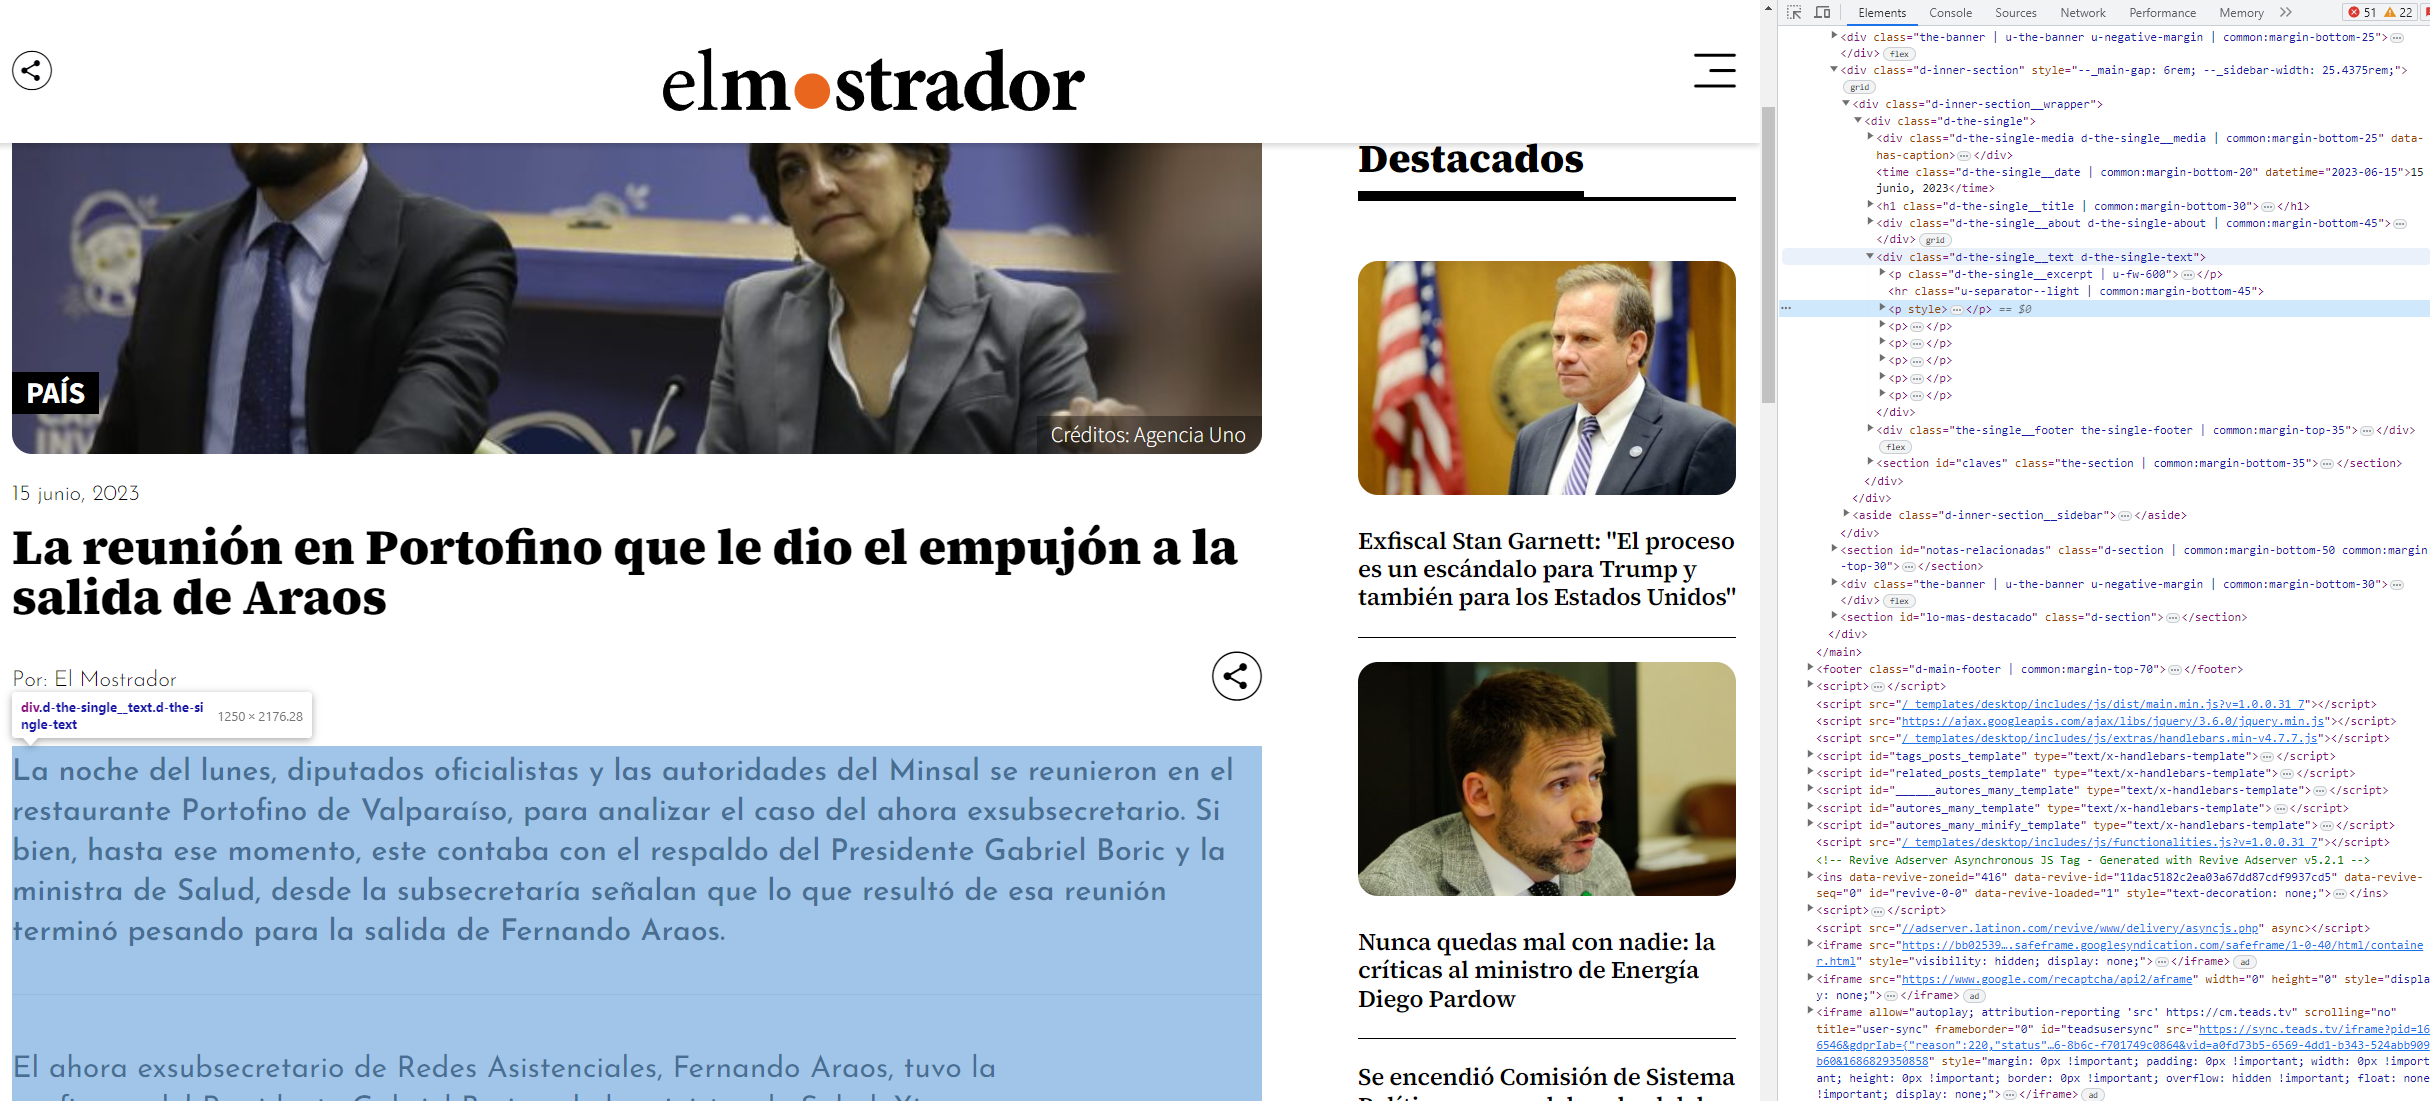

Entrando al sitio y utilizando las herramientas de desarrollador, se puede observar que el texto del artículo se encuentra dentro del div con nombrado con clase "d-the-single__text d-the-single-text"


In [16]:
link = 'https://www.elmostrador.cl/noticias/sin-editar/2023/06/15/la-reunion-en-portofino-que-le-dio-el-empujon-a-la-salida-de-araos/'
req = requests.get(link)

In [17]:
soup = BeautifulSoup(req.text, "html.parser") 

In [18]:
noticia = soup.find('div', {'class': 'd-the-single__text d-the-single-text'})
noticia


<div class="d-the-single__text d-the-single-text">
<p class="d-the-single__excerpt | u-fw-600">
                La noche del lunes, diputados oficialistas y las autoridades del Minsal se reunieron en el restaurante Portofino de ValparaÃ­so, para analizar el caso del ahora exsubsecretario. Si bien, hasta ese momento, este contaba con el respaldo del Presidente Gabriel Boric y la ministra de Salud, desde la subsecretarÃ­a seÃ±alan que lo que resultÃ³ de esa reuniÃ³n terminÃ³ pesando para la salida de Fernando Araos. 
              </p>
<hr class="u-separator--light | common:margin-bottom-45"/>
<p>El ahora exsubsecretario de Redes Asistenciales, Fernando Araos, tuvo la confianza del Presidente Gabriel Boric y de la ministra de Salud, Ximena Aguilera, hasta el dÃ­a martes. DespuÃ©s que el Gobierno aceptara el âerrorâ de no haber llamado a la ClÃ­nica Las Condes para habilitar una cama pediÃ¡trica para una lactante que lo necesitaba, la oposiciÃ³n pasÃ³ a la ofensiva y pidiÃ³ cargos, es

Proseguimos a generar una función que saque el texto de cada parrafo para construir la noticia como una string y finalmente, podemos iterar por todos los links obtenidos para obtener todas las noticias. Como se podrá notar, las noticias cuentan con carácteres extraños, este es un problema relacionado al encoding de las strings (esto no lo solucionaremos durante este curso, pero tienen las competencias para averiguar sobre el tema por su cuenta)

In [19]:
def extract_news(news: 'bs4.element.Tag') -> str:
    paragraphs = ""
    for paragraph in news.find_all('p'):
        paragraphs += paragraph.text
        
    return paragraphs
        

In [20]:
noticias = []
for link in links:
    req = requests.get(link)
    soup = BeautifulSoup(req.text, "html.parser") 
    noticia = soup.find('div', {'class': 'd-the-single__text d-the-single-text'})
    noticias.append(extract_news(noticia))
    

In [21]:
noticias

['\n                Hoy en Al Pan Pan con Mirna Schindler, conversamos con Stanley Garnett, abogado y exfiscal del distrito de Colorado en EE.UU, para abordar el caso de Donald Trump, quien enfrenta 37 cargos por mal manejo de documentos clasificados de relevancia nacional, durante su presidencia del paÃ\xads. Este proceso tiene implicancias que podrÃ\xadan afectar su nueva carrera a la Casa Blanca, lo que ha vuelto a tensionar el ambiente polÃ\xadtico. Por otro lado, hablamos con Ignacio Pascual, periodista que investiga El Yunque en Chile, y Silvia PeÃ±a, editora de El Mostrador, quiÃ©n sacÃ³ reportaje de los vÃ\xadnculos de la organizaciÃ³n secreta con JosÃ© Antonio Kast, y dio a conocer que Eduardo Guerrero, encargado econÃ³mico del excandidato presidencial Republicano, serÃ\xada quien lidera a la secta ultraconservadora en nuestro paÃ\xads. La organizaciÃ³n secreta de ultraderecha y catÃ³lica, con origen en MÃ©xico, se ha expandido por AmÃ©rica Latina y EspaÃ±a para instaurar el â